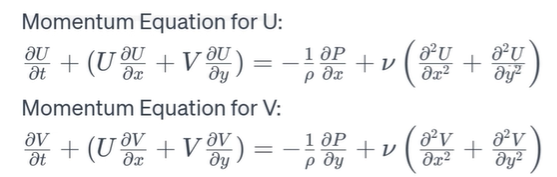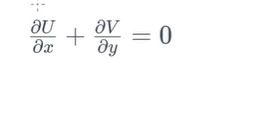

[link text](https://deepxde.readthedocs.io/en/stable/demos/pinn_forward/Kovasznay.flow.html) : Kovasznay Flow Documentation_DeepXDE Library
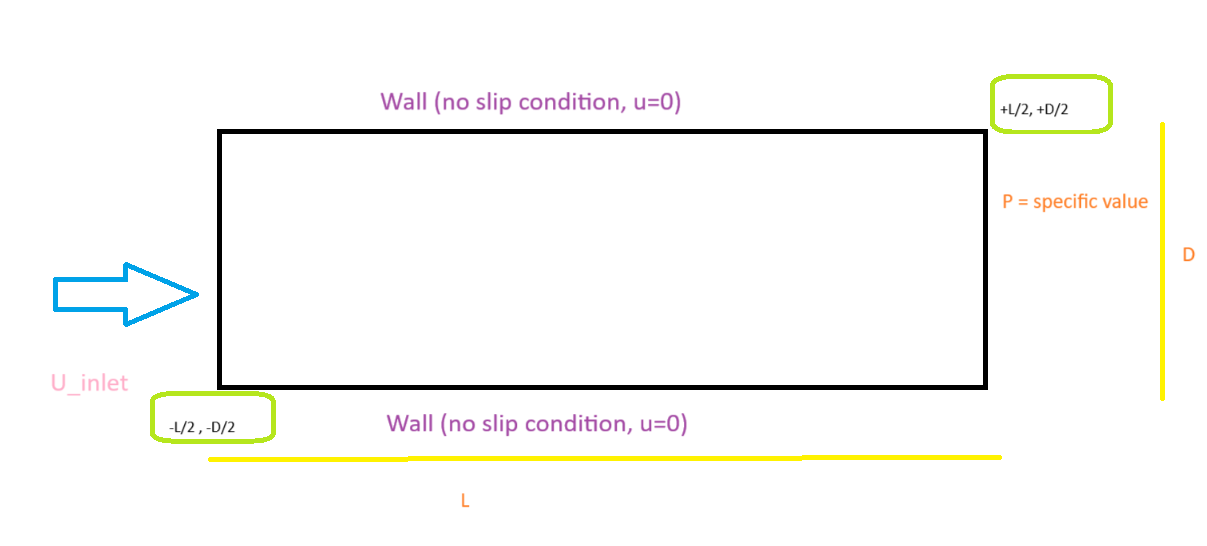

In [ ]:
!pip install deepxde

import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rho = 1
mu = 1
u_in =1
D = 1
L = 2


In [ ]:
geom = dde.geometry.Rectangle(xmin=[-L/2,-D/2],xmax = [L/2,D/2])
# Defining a rectangular geometry using the dde.geometry.Rectangle class from the deepxde package.

In [ ]:
def boundary_wall(X,on_boundary):
  print("X",X)
  print("on_boundary",on_boundary)
  on_wall = np.logical_and(np.logical_or(np.isclose(X[1],-D/2,rtol = 1e-05,atol = 1e-08),np.isclose(X[1],D/2,rtol = 1e-05,atol = 1e-08)),on_boundary)
  # The point is on_boundary and it is either on upper surface ot lower surface.
  return on_wall
# boundary_wall:To Check if the point is on the upper or lower wall of the rectangle defined by geom. It uses np.isclose to account for numerical precision.
def boundary_inlet(X,on_boundary):
  on_inlet =  np.logical_and(np.isclose(X[0],-L/2,rtol = 1e-05,atol = 1e-08),on_boundary)
  return on_inlet
#boundary_inlet: To Check if the point is on the left side (inlet) of the rectangle.
def boundary_outlet(X,on_boundary):
  on_outlet = np.logical_and(np.isclose(X[0],L/2,rtol = 1e-05,atol = 1e-08),on_boundary)
  return on_outlet
# boundary_outlet: To Check if the point is on the right side (outlet) of the rectangle.

In [ ]:
# Defining Dirichlet boundary conditions using the dde.DirichletBC class from the deepxde package

# Dirichlet boundary conditions on the wall for the velocity components (u and v). Both components are set to 0.
bc_wall_u = dde.DirichletBC(geom,lambda X:0. ,boundary_wall,component=0)
bc_wall_v = dde.DirichletBC(geom,lambda X:0. ,boundary_wall,component=1)

#  Dirichlet boundary conditions on the inlet for the velocity components.
# The u-component is set to u_in (which appears to be a constant value), and the v-component is set to 0.
bc_inlet_u = dde.DirichletBC(geom,lambda X:u_in ,boundary_inlet,component=0)
bc_inlet_v = dde.DirichletBC(geom,lambda X:0. ,boundary_inlet,component=1)
# Dirichlet boundary conditions on the outlet for the pressure (p) and velocity (v) components.
# The pressure component (component=2) is set to 0, and the v-component is set to 0.
bc_outlet_p = dde.DirichletBC(geom,lambda X:0. ,boundary_outlet,component=2)
bc_outlet_v = dde.DirichletBC(geom,lambda X:0. ,boundary_outlet,component=1)

In [ ]:
# defining the partial differential equations (PDEs) for our problem in the pde function.
# These PDEs represent the conservation of momentum and mass for the fluid flow problem

def pde(X,Y):
  du_x   = dde.grad.jacobian(Y, X, i=0, j=0)
  du_y   = dde.grad.jacobian(Y, X, i=0, j=1)
  dv_x   = dde.grad.jacobian(Y, X, i=1, j=0)
  dv_y   = dde.grad.jacobian(Y, X, i=1, j=1)
  dp_x   = dde.grad.jacobian(Y, X, i=2, j=0)
  dp_y   = dde.grad.jacobian(Y, X, i=2, j=1)
  du_xx = dde.grad.hessian(Y, X, component=0, i=0, j=0)
  du_yy = dde.grad.hessian(Y, X, component=0, i=1, j=1)
  dv_xx = dde.grad.hessian(Y, X, component=1, i=0, j=0)
  dv_yy = dde.grad.hessian(Y, X, component=1, i=1, j=1)
 # The PDEs for the u-component, v-component, and continuity equation, respectively.
  pde_u    = Y[:,0:1]*du_x + Y[:,1:2]*du_y + 1/rho * dp_x - (mu/rho)*(du_xx+du_yy)
  pde_v    = Y[:,0:1]*dv_x + Y[:,1:2]*dv_y + 1/rho * dp_y - (mu/rho)*(dv_xx+dv_yy)
  pde_cont = du_x + dv_y

  return [pde_u,pde_v,pde_cont]

In [ ]:
# Setting up data for the problem using dde.data.PDE
# The PDE class helps in generating the training and testing data for the neural network based on the provided PDE and boundary conditions.
data = dde.data.PDE(geom,
                    pde,
                    [bc_wall_u,bc_wall_v,bc_inlet_u,bc_inlet_v,bc_outlet_p,bc_outlet_v],
                    num_domain = 2000,
                    num_boundary = 200,
                    num_test = 200
                    )
# num_domain: The number of random points sampled in the interior of the geometry for training the neural network.
# num_boundary: The number of points sampled on the boundary for training the neural network.
# num_test : The number of points used for testing the neural network.

Streaming output truncated to the last 5000 lines.
X [0.2919922  0.35007495]
on_boundary False
X [-0.20800781  0.35057473]
on_boundary False
X [0.7919922  0.35107446]
on_boundary False
X [-0.8330078   0.35157424]
on_boundary False
X [0.16699219 0.35207397]
on_boundary False
X [-0.3330078  0.3525737]
on_boundary False
X [0.6669922  0.35307348]
on_boundary False
X [-0.5830078  0.3535732]
on_boundary False
X [0.4169922 0.354073 ]
on_boundary False
X [-0.08300781  0.3545727 ]
on_boundary False
X [0.9169922  0.35507244]
on_boundary False
X [-0.8955078   0.35557222]
on_boundary False
X [0.10449219 0.35607195]
on_boundary False
X [-0.3955078   0.35657173]
on_boundary False
X [0.6044922  0.35707146]
on_boundary False
X [-0.6455078   0.35757118]
on_boundary False
X [0.3544922  0.35807097]
on_boundary False
X [-0.14550781  0.3585707 ]
on_boundary False
X [0.8544922  0.35907048]
on_boundary False
X [-0.7705078  0.3595702]
on_boundary False
X [0.22949219 0.36007   ]
on_boundary False
X [-0.2705078

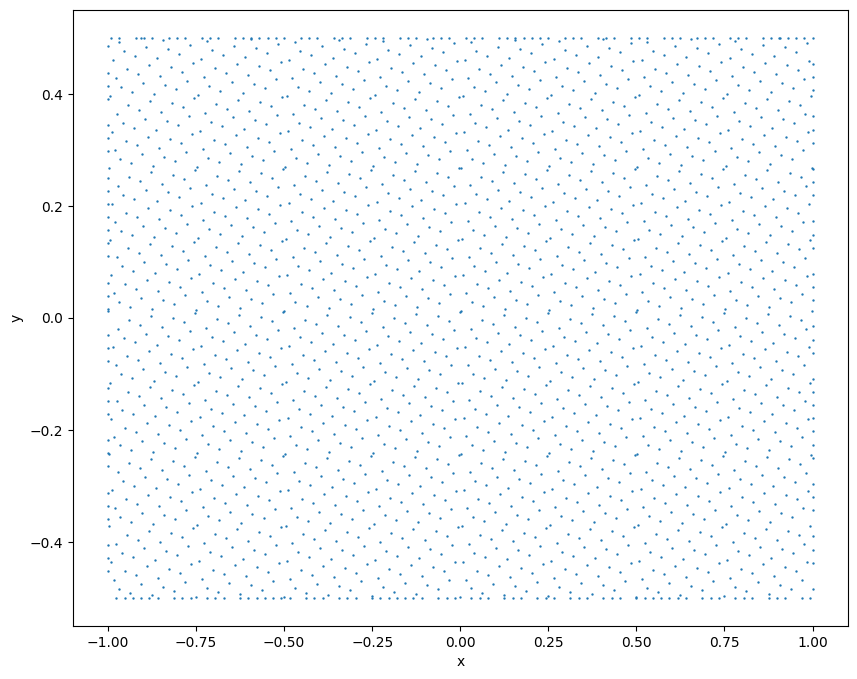

In [ ]:
# Visulaization of training data using scatter plot.
plt.figure(figsize=(10,8))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1],s=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# data.train_x_all contains the coordinates of the training points

In [ ]:
# Defining a feedforward neural network (FNN) using the dde.maps.FNN class from the deepxde package
net = dde.maps.FNN([2]+[64]*5+[3],"tanh","Glorot uniform")

[2]+[64]*5+[3]: The architecture of the neural network. This specific configuration suggests a network with an input layer of 2 neurons, followed by 5 hidden layers with 64 neurons each, and an output layer with 3 neurons. The numbers in the list represent the number of neurons in each layer.

"Glorot uniform": The weight initialization method. Glorot uniform, also known as Xavier uniform initialization, is a popular choice for initializing weights in neural networks.

This neural network architecture will be used to approximate the solution to the PDE defined earlier.

In [ ]:
#  creating a deep learning model using the dde.Model class from the deepxde package.

model = dde.Model(data,net)
# Initializes a deep learning model with the provided data and neural network.
# The data variable contains the problem data (geometry, PDE, and boundary conditions), and net is the neural network architecture.


model.compile("adam",lr=1e-03)
# Compiling the model using the Adam optimizer with a learning rate of 1e-03.
# This step prepares the model for training

Compiling model...
Building feed-forward neural network...
'build' took 0.158160 s



/usr/local/lib/python3.10/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 2.581810 s



In [ ]:
losshistory,train_state=model.train(epochs=10000)

# Training the deep learning model using the model.train method with 10,000 epochs.
# The training process returns two values: losshistory and train_state.

# losshistory: This variable  contains the training loss values over each epoch.
#We can use it to visualize how the loss changes during training, helping us to  assess the convergence and performance of our model.

# train_state: This variable includes information about the training process, such as the time taken, convergence status, and other relevant details.

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
0         [2.04e-02, 5.55e-02, 4.32e-01, 1.89e-02, 6.12e-02, 1.37e+00, 1.80e-02, 3.77e-03, 1.97e-02]    [1.87e-02, 4.96e-02, 4.45e-01, 1.89e-02, 6.12e-02, 1.37e+00, 1.80e-02, 3.77e-03, 1.97e-02]    []  
1000      [9.03e-04, 7.53e-04, 1.03e-02, 3.01e-02, 1.49e-02, 3.89e-02, 3.73e-03, 4.81e-04, 2.26e-05]    [6.82e-04, 4.23e-04, 5.88e-03, 3.01e-02, 1.49e-02, 3.89e-02, 3.73e-03, 4.81e-04, 2.26e-05]    []  
2000      [7.94e-04, 7.89e-04, 4.41e-03, 2.26e-02, 1.02e-02, 3.29e-02, 5.44e-04, 2.07e-04, 1.67e-05]    [4.22e-04, 4.32e-04, 2.37e-03, 2.26e-02, 1.02e-02, 3.29e-02, 5.44e-04, 2.07e-04, 1.67e-05]    []  
3000      [1.07e-02, 3.89e-03, 3.28e-03, 2.03e-02, 8.23e-03, 2.72e-02, 1.04e-03, 5.20e-03, 1.38e-04]    [9.05e-03, 3.94e-03, 1.70e-03, 2.03e-02, 8.23e-03, 2.72e-0

In [ ]:
#  using the L-BFGS optimizer for training the deep learning model using the dde.Model class from the deepxde package.

dde.optimizers.config.set_LBFGS_options(maxiter=3000)
# dde.optimizers.config.set_LBFGS_options(maxiter=3000): Sets the options for the L-BFGS optimizer.
# In this case,we are specifying a maximum of 3000 iterations for the optimizer.

model.compile("L-BFGS")
# Configuring the model to use the L-BFGS optimizer for training.

losshistory,train_state=model.train()
# Performing the training using the L-BFGS optimizer, and the results are stored in losshistory and train_state.

dde.saveplot(losshistory,train_state,issave=False,isplot=False)
# To plot the training loss.

Compiling model...
'compile' took 1.073520 s

Training model...

Step      Train loss                                                                                    Test loss                                                                                     Test metric
10000     [9.45e-03, 2.08e-03, 1.86e-03, 1.49e-02, 5.61e-03, 1.50e-02, 5.17e-03, 2.60e-03, 1.72e-05]    [8.76e-03, 1.27e-03, 7.65e-04, 1.49e-02, 5.61e-03, 1.50e-02, 5.17e-03, 2.60e-03, 1.72e-05]    []  
11000     [7.37e-04, 6.49e-04, 8.95e-04, 7.89e-03, 1.31e-03, 5.58e-03, 2.39e-03, 2.12e-06, 8.51e-06]    [7.37e-04, 6.49e-04, 8.95e-04, 7.89e-03, 1.31e-03, 5.58e-03, 2.39e-03, 2.12e-06, 8.51e-06]        
12000     [3.25e-04, 3.30e-04, 7.74e-04, 4.71e-03, 9.44e-04, 4.26e-03, 1.31e-03, 2.44e-06, 1.14e-06]    [3.25e-04, 3.30e-04, 7.74e-04, 4.71e-03, 9.44e-04, 4.26e-03, 1.31e-03, 2.44e-06, 1.14e-06]        
13000     [2.41e-04, 3.50e-04, 5.66e-04, 3.58e-03, 9.11e-04, 3.43e-03, 1.05e-03, 1.18e-05, 5.06e-06]    [2.41e-04, 3

In [ ]:
# Generating 500,000 random points within the geometry using geom.random_points(500000)
# Using our trained model (model) to predict the solution at these points using model.predict(samples)
samples = geom.random_points(500000)

# The result variable  contains the predicted solution at the randomly sampled points
result =  model.predict(samples)


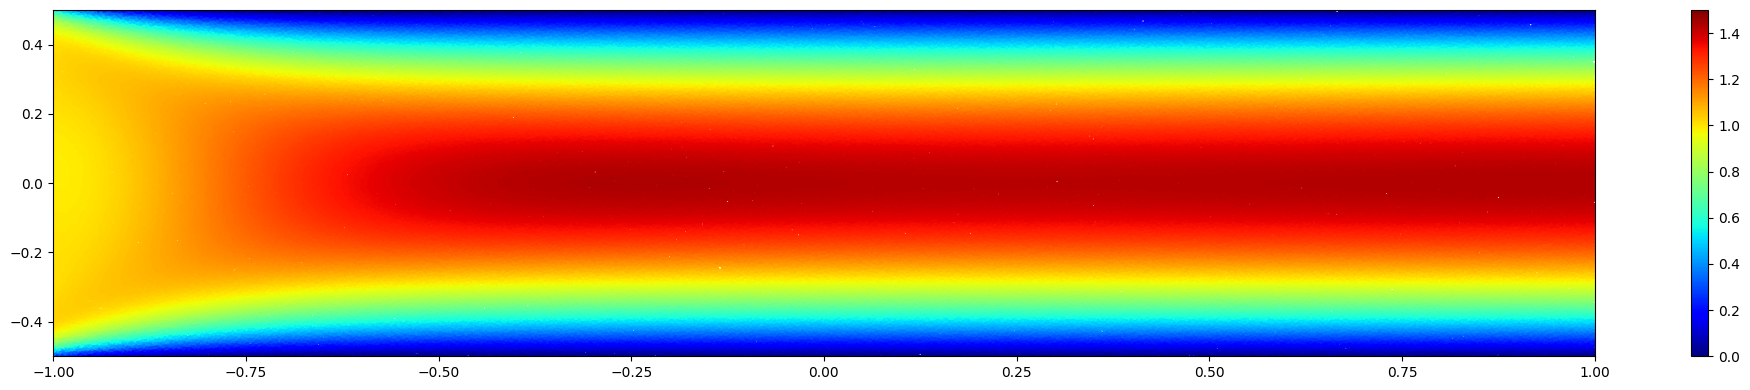

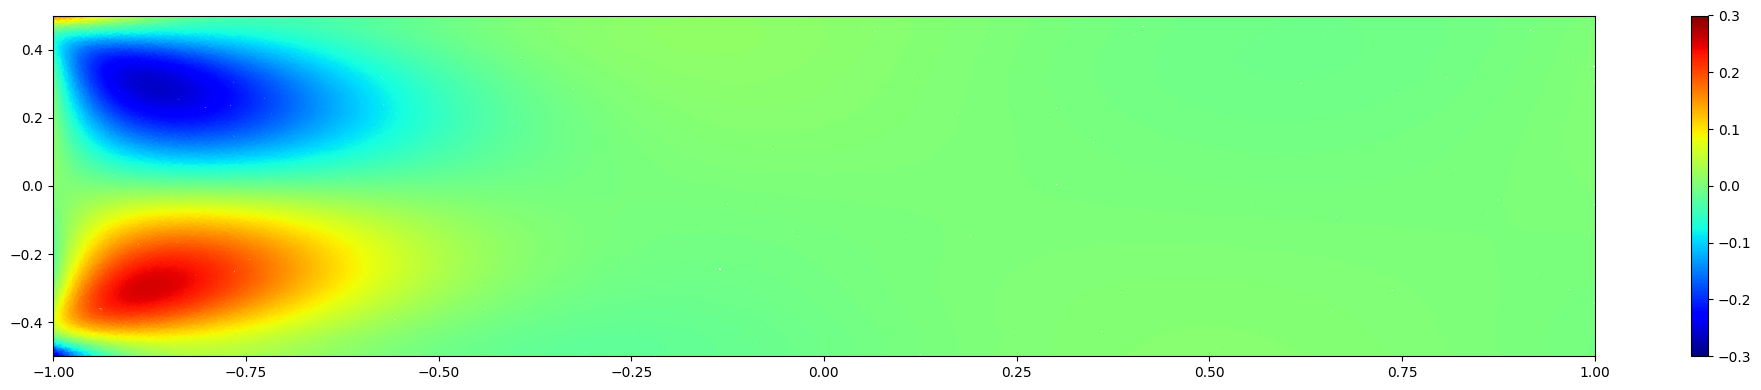

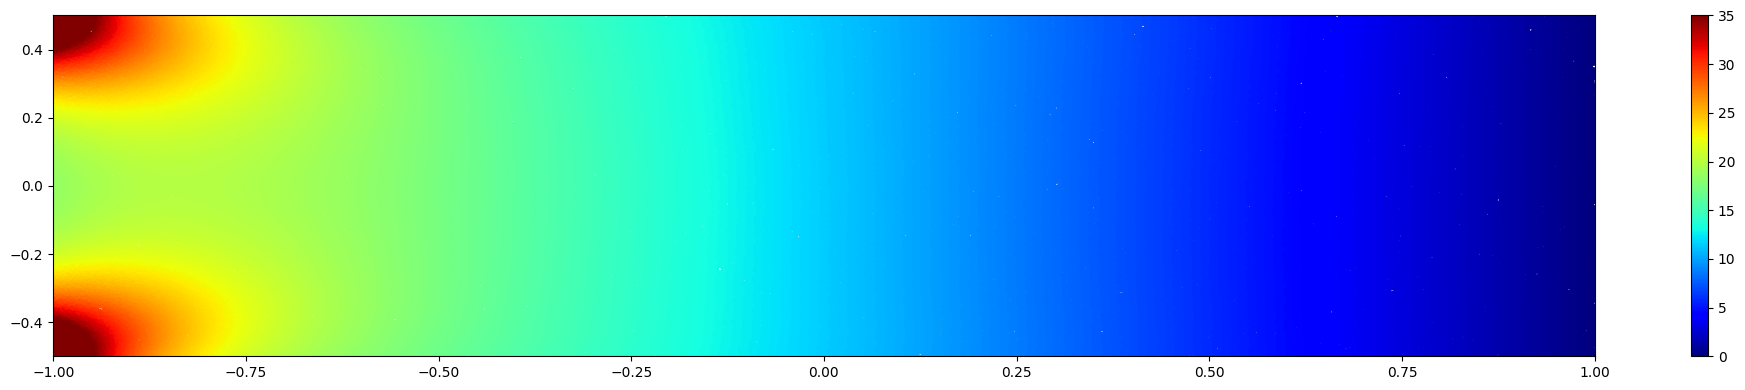

In [ ]:
# Specifying color range for each component
color_legend = [[0,1.5],[-0.3,0.3],[0,35]]

for idx in range(3):
  plt.figure(figsize=(20,4))
# plt.scatter to create a scatter plot of the sampled points, where the color is determined by the predicted solution for the current component (result[:,idx]).
  plt.scatter(samples[:,0],
              samples[:,1],
              c = result[:,idx],
              cmap='jet',
              s=2
              )
  plt.colorbar()
# Set the color limits for the color bar based on the specified color legend (plt.clim(color_legend[idx])).
  plt.clim(color_legend[idx])

# Adjust the x and y axis limits based on the geometry limits (plt.xlim and plt.ylim).
  plt.xlim((0-L/2,L-L/2))
  plt.ylim((0-D/2,D-D/2))
  plt.tight_layout()
  plt.show()